<a href="https://colab.research.google.com/github/Vo-Hao250604/Student-Habits-and-Academic-Performance-Analysis/blob/main/Student_Habits_and_Academic_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# chạy kết nối tới drive có sẵn data của Student

Mounted at /content/drive


# 1.Read Data






```
Mô tả chi tiết về (các) bộ dữ liệu được sử dụng: nguồn gốc, số lượng thuộc tính, số lượng mẫu, ý nghĩa của các thuộc tính.
```




## 1.1 Import Data & Package


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('ticks')  # cài style biểu đồ tối giản, gọn gàng
sns.set_palette('husl') # cài bảng màu tươi sáng, phân biệt rõ các nhóm
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/enhanced_student_habits_performance_dataset.csv")
df

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,179995,16,Male,Engineering,3.700000,2.1,1.0,Yes,80.8,6.1,...,8.3,Library,No,Low,1,4,10,Auditory,5.3,88
79996,179996,16,Female,Business,1.200000,0.4,2.9,No,99.5,4.1,...,4.7,Co-Learning Group,No,Low,3,2,10,Kinesthetic,6.8,52
79997,179997,26,Female,Arts,4.100000,1.6,1.6,Yes,46.1,8.3,...,7.5,Dorm,No,Medium,7,1,10,Visual,1.3,89
79998,179998,23,Other,Biology,3.800000,0.6,3.5,Yes,58.7,5.8,...,9.3,Quiet Room,Yes,Low,2,8,7,Kinesthetic,3.7,96


Sau khi xem qua bảng thống kê, có thể thấy dữ liệu nói về một nhóm sinh viên đại học với các thông tin từ độ tuổi, thói quen học tập, sinh hoạt cho đến tâm lý và kết quả thi.

Trung bình, sinh viên trong nhóm này khoảng 22 tuổi, phổ biến nhất là từ 19 - 25 tuổi. Về việc học, mỗi ngày các sinh viên dành khoảng 4 tiếng để học, nhưng cũng có bạn học rất ít hoặc thậm chí là không học tí nào trong ngày. Trong khi đó, thời gian lướt mạng xã hội khoảng 2 tiếng rưỡi, còn xem Netflix thì trung bình tầm 2 tiếng - tức là cũng không quá nhiều so với tưởng tượng.

Tỷ lệ đi học thì có vẻ hơi dao động. Trung bình sinh viên đi học khoảng 70% số buổi, nhưng có sinh viên chỉ đi khoảng 40%, trong khi người chăm nhất thì đủ 100%. Giấc ngủ nhìn chung khá ổn - trung bình 7 tiếng mỗi đêm, phần lớn mọi người đi ngủ 6-8 tiếng, tức là không quá thiểu ngủ, nhưng cũng chưa hẳn là lý tưởng với tất cả sinh viên.

Về việc tập thể dục thì không đều lắm. Có bạn siêng năng, có bạn không tập gì. Trung bình mỗi người tập khoảng 3 đến 4 lần mỗi tuần. Còn khi tự đánh giá sức khỏe tinh thần, các bạn thường cho mình điểm 6 - 7 trên thang 10, tức là cảm thấy khá ổn.

Điểm GPA trung bình trước đây cũng khá cao - khoảng 3.6/4.0, cho thấy đây là một nhóm sinh viên có năng lực học tập tốt. Về mặt tinh thần, mức độ căng thẳng cũng ở mức vừa phải, tầm 5 điểm, còn hoạt động xã hội thì không quá nổi bật, trung bình khoảng 2,5/5 điểm.

Điều đáng chú ý là thời gian nhìn màn hình mỗi ngày khá nhiều - gần 10 tiếng, chắc là bao gồm học online, lướt mạng, giải trí,... Sự hỗ trợ từ gia đình, động lực học tập và khả năng quản lý thời gian thì mỗi người mỗi kiểu, nhưng điểm trung bình đều quanh mức 5 đến 6.

Một điểm nổi bật nữa là rất nhiều bạn bị lo lắng khi thi - điểm lo lắng trung bình tận 8,5/10, có không ít bạn đạt mức lo lắng cao nhất. Tuy vậy, kết quả thi lại rất ấn tượng: điểm trung bình lên đến 89 điểm, nhiều bạn đạt từ 82 - 100 điểm, cho thấy đa phần đều học tốt và đạt kết quả cao.


## 1.2 Data dictionary



```
student_id: Mã định danh duy nhất của học sinh.
age: Độ tuổi của học sinh (16–28).
gender: Nam, Nữ hoặc Khác.
major: Lĩnh vực nghiên cứu (ví dụ: Khoa học máy tính, Kỹ thuật, Nghệ thuật).
study_hours_per_day: Số giờ học trung bình mỗi ngày.
social_media_hours, netflix_hours, screen_time: Thời gian sử dụng nhiều màn hình khác nhau.
part_time_job: Học sinh có việc làm hay không (Có/Không).
attendance_percentage: Tỷ lệ đi học theo phần trăm.
sleep_hours, exercise_frequency, diet_quality: Các yếu tố lối sống.
mental_health_rating, stress_level, exam_anxiety_score: Các chỉ số tâm lý (1–10).
extracurricular_participation, access_to_tutoring: Hỗ trợ và tương tác.
family_income_range, parental_support_level, parental_education_level: Bối cảnh và hỗ trợ.
motivation_level, time_management_score: Kỹ năng tự quản lý (1–10).
learning_style: Phương pháp học tập được ưa thích.
study_environment: Địa điểm chung để học tập.
dropout_risk: Có/Không — xuất phát từ mức độ căng thẳng và động lực.
previous_gpa, exam_score: Chỉ số hiệu suất mục tiêu.
```





#2.Data Quality

In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
major,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0


#3.EDA

##3.1 Kiểm tra Dữ liệu

In [ ]:
df.shape

(80000, 31)

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')

In [ ]:
#Thông tin cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [ ]:
#Thông số của dataset
print("Data describe: ")
cm = sns.light_palette("green", as_cmap=True)
display(df.describe().T.style.background_gradient(cmap=cm))

Data describe: 


,count,mean,std,min,25%,50%,75%,max
student_id,80000.000000,139999.500000,23094.155105,100000.000000,119999.750000,139999.500000,159999.250000,179999.000000
age,80000.000000,22.004288,3.745570,16.000000,19.000000,22.000000,25.000000,28.000000
study_hours_per_day,80000.000000,4.174388,2.004135,0.000000,2.800000,4.125624,5.500000,12.000000
social_media_hours,80000.000000,2.501366,1.445441,0.000000,1.200000,2.500000,3.800000,5.000000
netflix_hours,80000.000000,1.997754,1.155992,0.000000,1.000000,2.000000,3.000000,4.000000
attendance_percentage,80000.000000,69.967884,17.333015,40.000000,55.000000,69.900000,84.900000,100.000000
sleep_hours,80000.000000,7.017417,1.467377,4.000000,6.000000,7.000000,8.000000,12.000000
exercise_frequency,80000.000000,3.516587,2.291575,0.000000,2.000000,4.000000,6.000000,7.000000
mental_health_rating,80000.000000,6.804107,1.921579,1.000000,5.500000,6.900000,8.200000,10.000000
previous_gpa,80000.000000,3.602448,0.462876,1.640000,3.270000,3.790000,4.000000,4.000000


In [ ]:
#5 dòng đầu tiên
df.head(5)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


##3.2 Phân tích Đơn biến

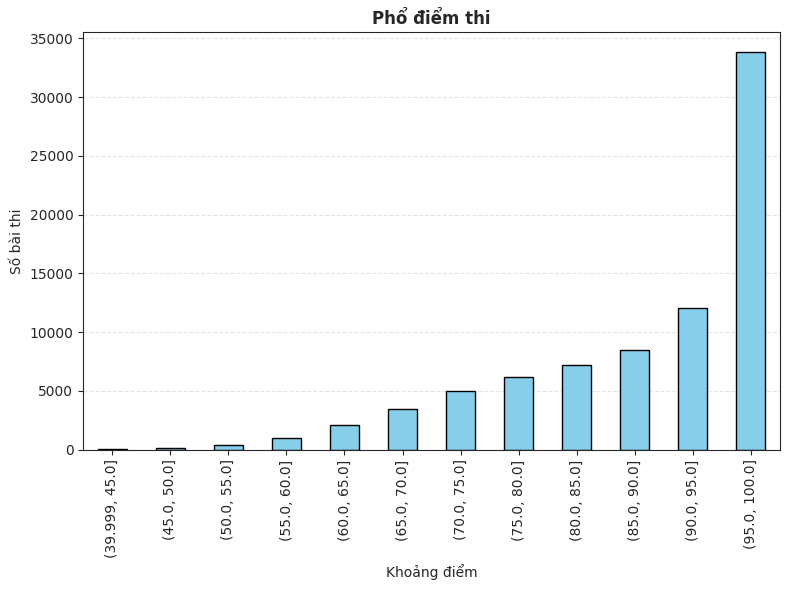

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Biểu đồ điểm thi
bins = np.arange(40,101,5)
pho_exam_score = df['exam_score'].value_counts(bins=bins).sort_index()

pho_exam_score.plot(kind='bar', figsize=(8,6), color='skyblue', edgecolor='black')
plt.title("Phổ điểm thi", fontweight='bold')
plt.xlabel("Khoảng điểm")
plt.ylabel("Số bài thi")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

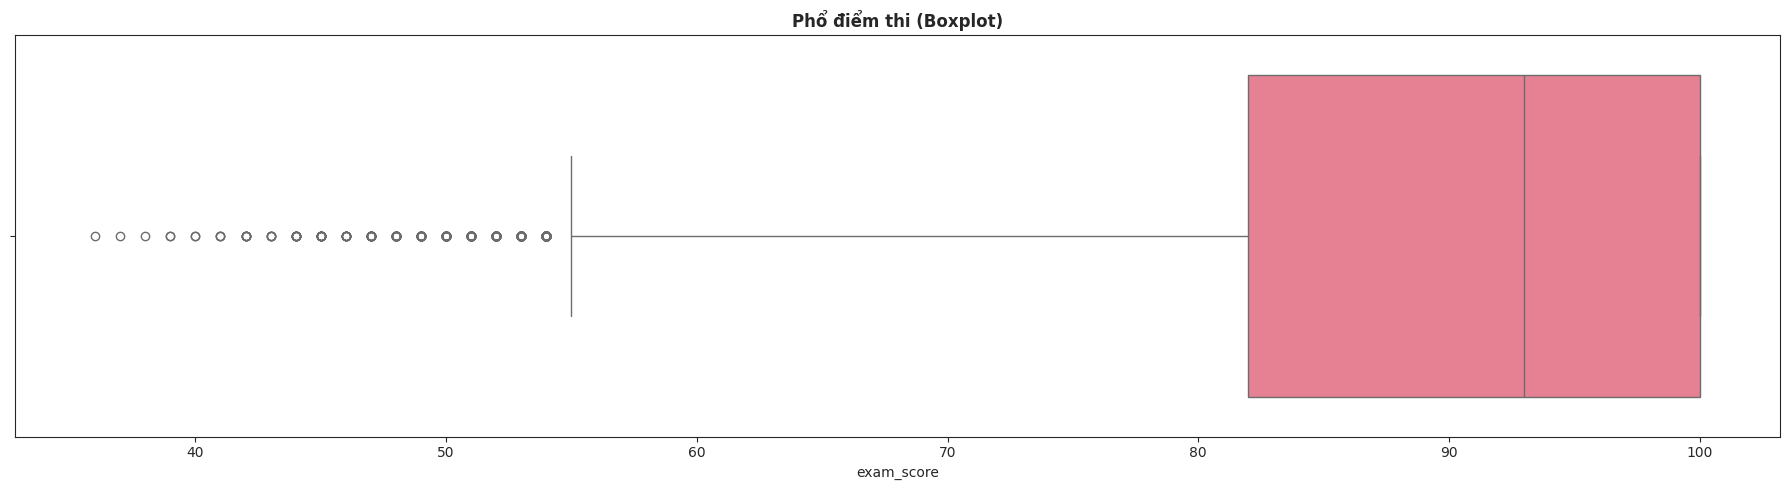

In [ ]:
#Boxplot điểm thi
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['exam_score'], orient='h')
plt.title("Phổ điểm thi (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

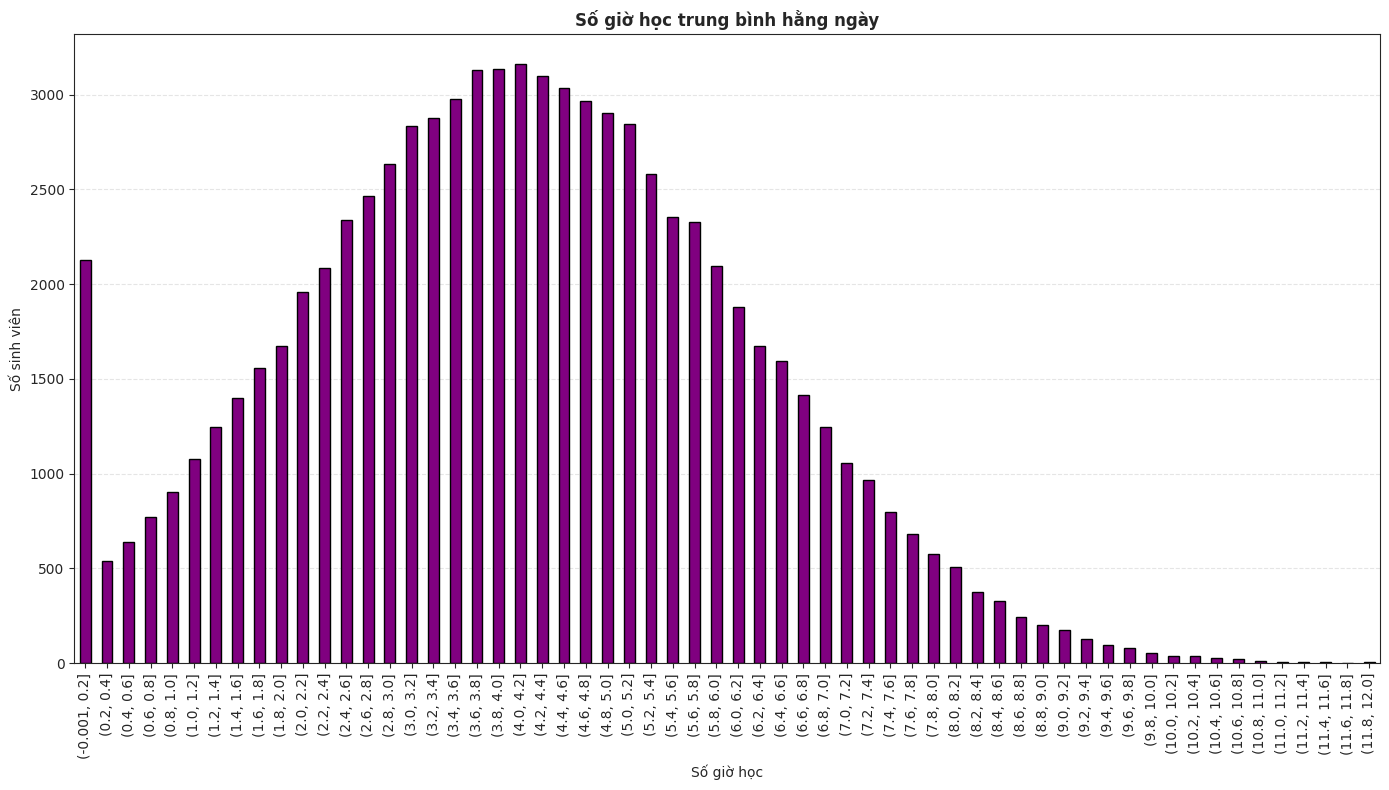

In [ ]:
#Biểu đồ số giờ học trung bình hằng ngày
bins = np.arange(0,12.2,0.2)
pho_study_hours_per_day = df['study_hours_per_day'].value_counts(bins=bins).sort_index()

pho_study_hours_per_day.plot(kind='bar', figsize=(14,8), color="purple", edgecolor="black")
plt.title("Số giờ học trung bình hằng ngày", fontweight='bold')
plt.xlabel("Số giờ học")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

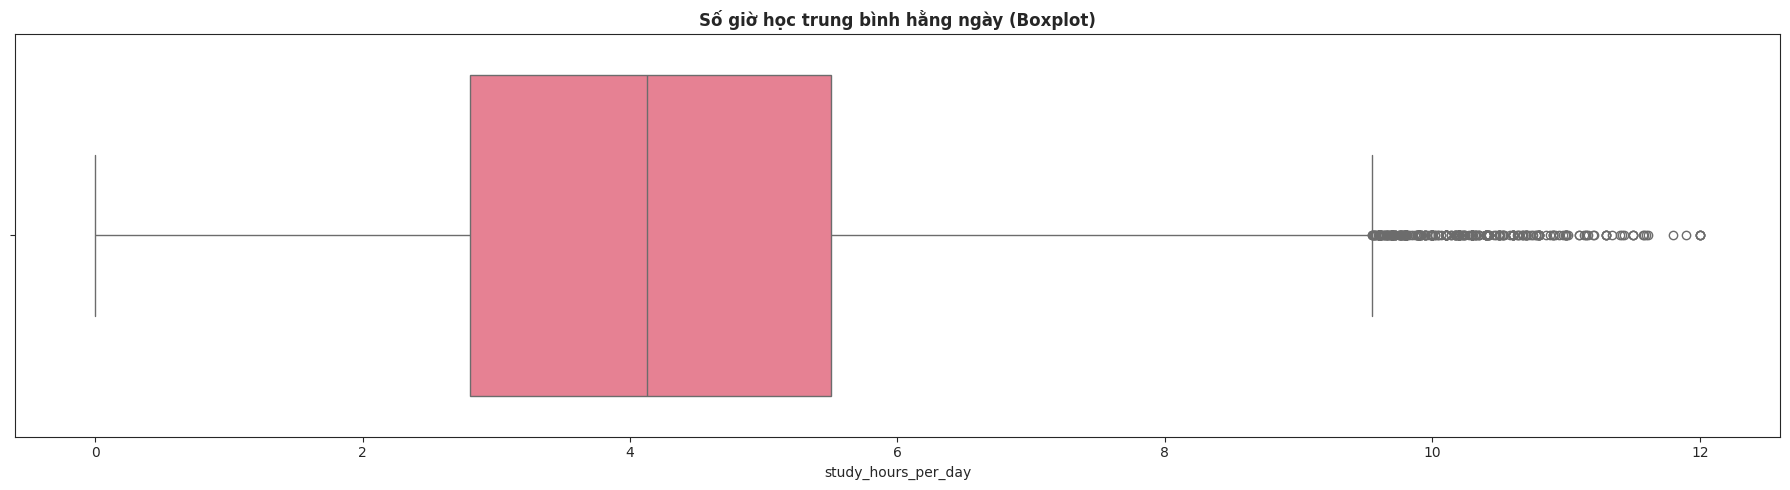

In [ ]:
#Boxplot số giờ học trung bình hằng ngày
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['study_hours_per_day'], orient='h')
plt.title("Số giờ học trung bình hằng ngày (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

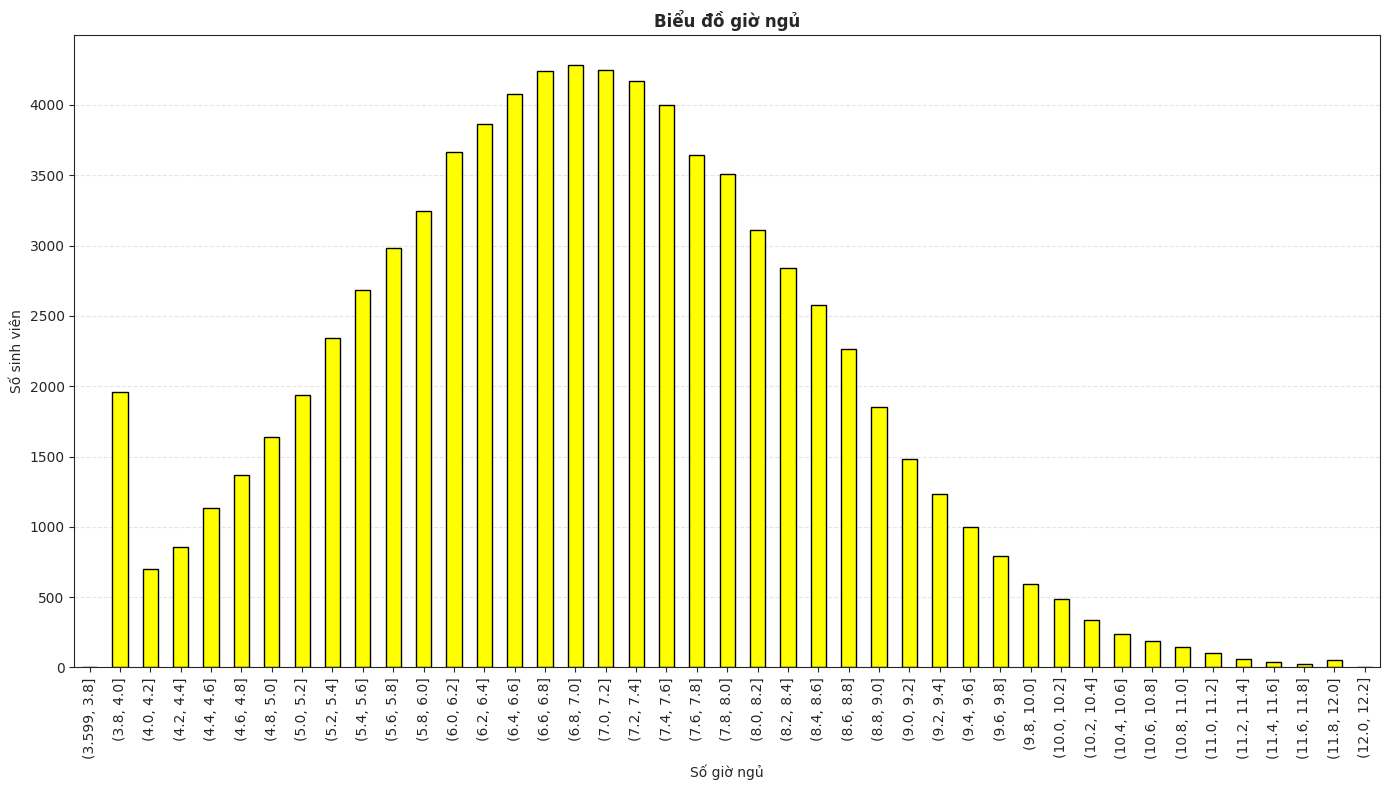

In [ ]:
#Biểu đồ số giờ ngủ
bins = np.arange(3.6,12.4,0.2)
pho_sleep_hours = df['sleep_hours'].value_counts(bins=bins).sort_index()

pho_sleep_hours.plot(kind='bar', figsize=(14,8), color="yellow", edgecolor="black")
plt.title("Biểu đồ giờ ngủ", fontweight='bold')
plt.xlabel("Số giờ ngủ")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

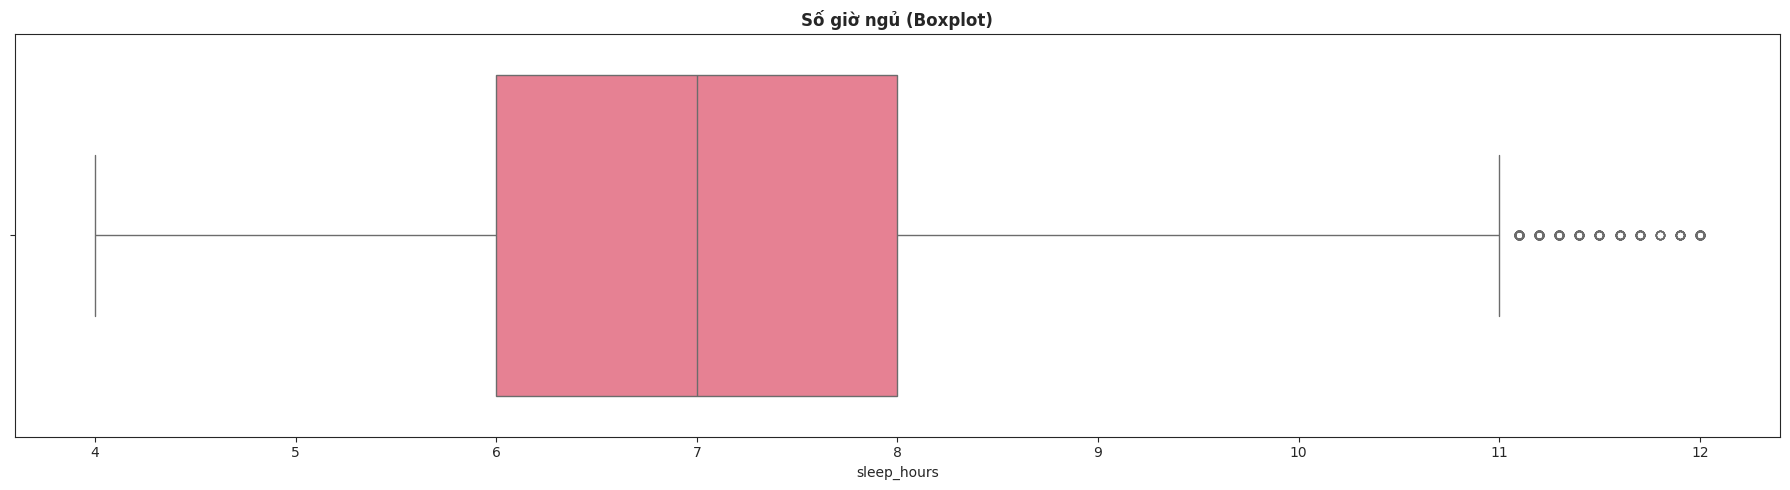

In [ ]:
#Boxplot số số giờ ngủ
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['sleep_hours'], orient='h')
plt.title("Số giờ ngủ (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

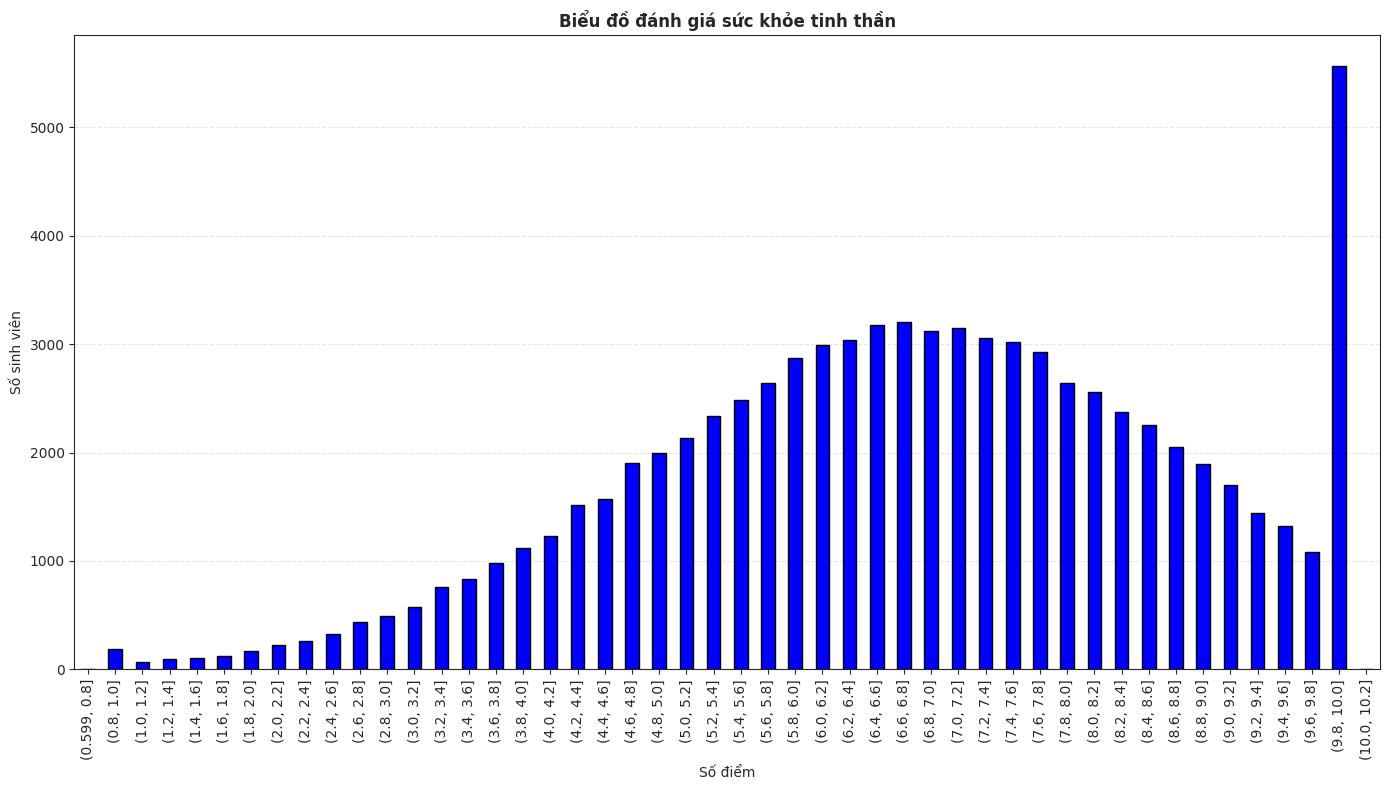

In [ ]:
#Biểu đồ đánh giá sức khỏe tinh thần
bins = np.arange(0.6,10.4,0.2)
pho_mental_health_rating = df['mental_health_rating'].value_counts(bins=bins).sort_index()

pho_mental_health_rating.plot(kind='bar', figsize=(14,8), color="blue", edgecolor="black")
plt.title("Biểu đồ đánh giá sức khỏe tinh thần", fontweight='bold')
plt.xlabel("Số điểm")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

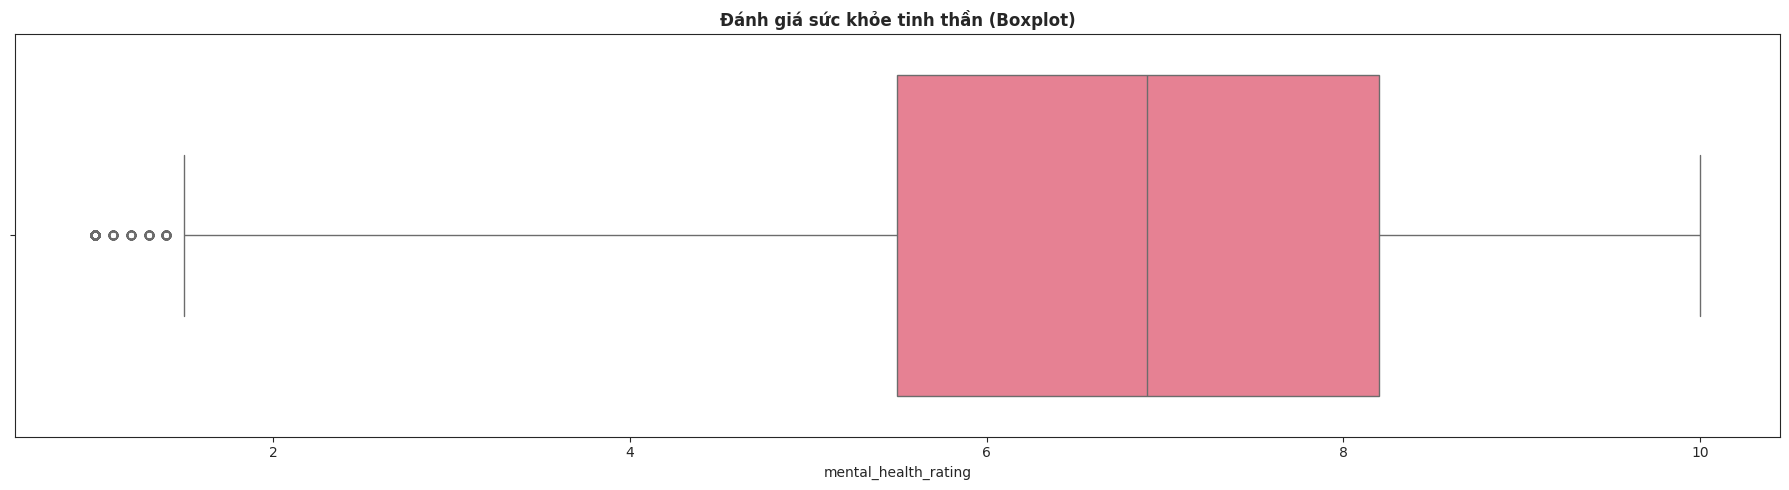

In [ ]:
#Boxplot đánh giá sức khỏe tinh thần
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['mental_health_rating'], orient='h')
plt.title("Đánh giá sức khỏe tinh thần (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

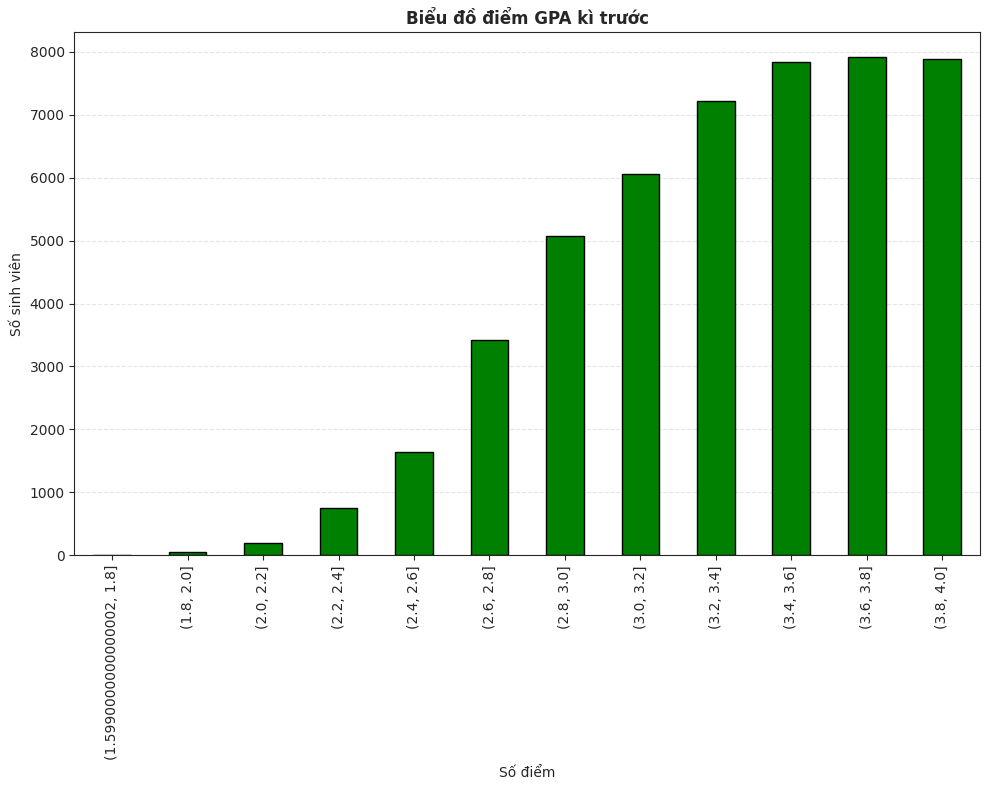

In [ ]:
#Biểu đồ điểm GPA kì trước
bins = np.arange(1.6,4.2,0.2)
pho_previous_gpa = df['previous_gpa'].value_counts(bins=bins).sort_index()

pho_previous_gpa.plot(kind='bar', figsize=(10,8), color="green", edgecolor="black")
plt.title("Biểu đồ điểm GPA kì trước", fontweight='bold')
plt.xlabel("Số điểm")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

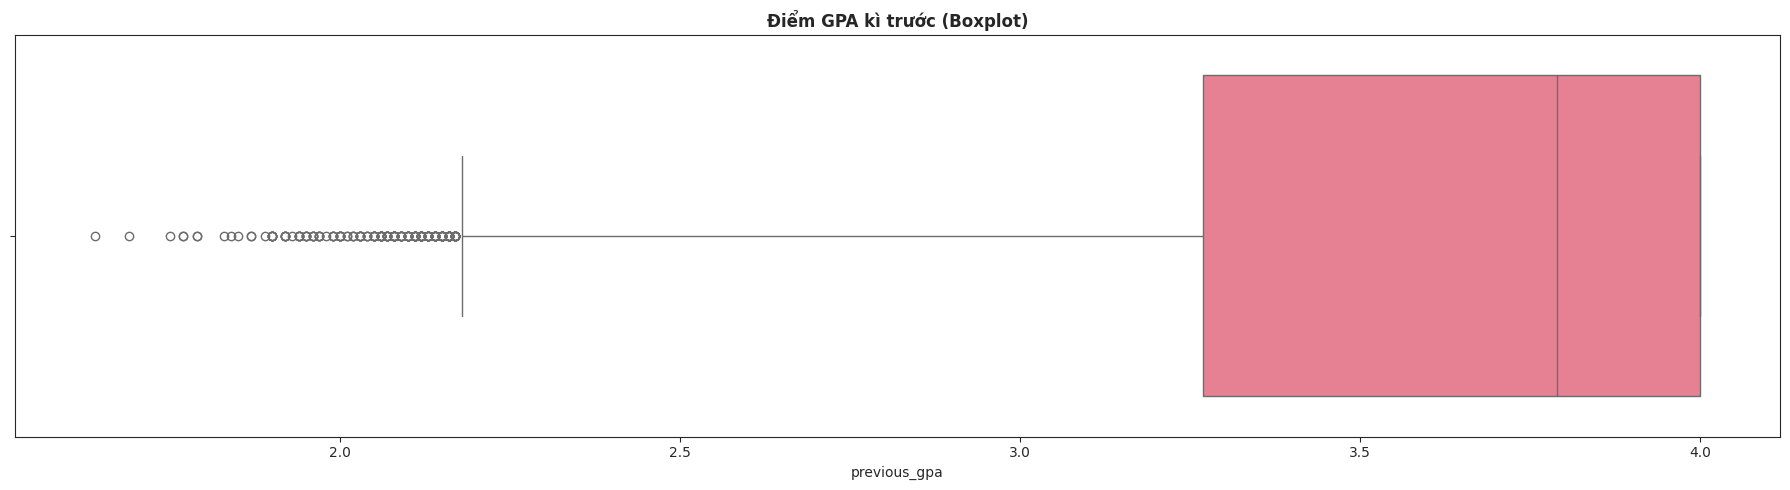

In [ ]:
#Boxplot điểm GPA kì trước
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['previous_gpa'], orient='h')
plt.title("Điểm GPA kì trước (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

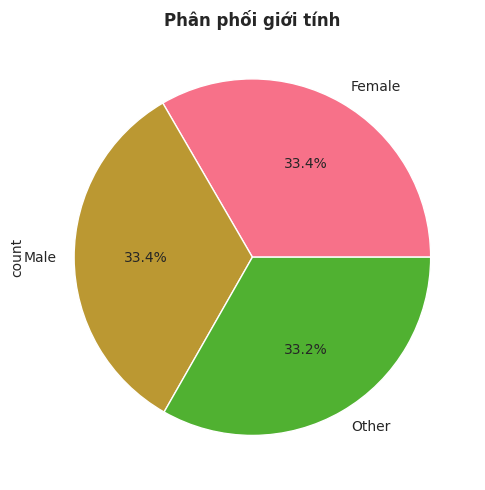

In [ ]:
#Giới tính
plt.subplots(figsize=(18, 5))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Phân phối giới tính', fontweight='bold')
plt.tight_layout()
plt.show()

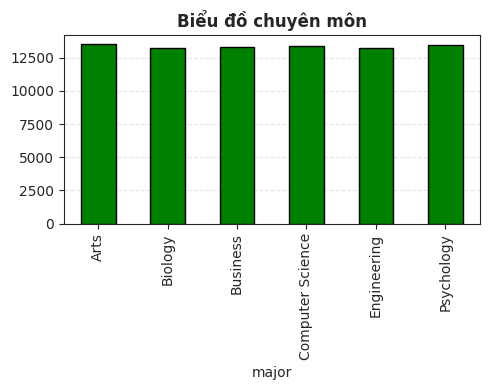

In [ ]:
#Biểu đồ chuyên môn
df['major'].value_counts().sort_index().plot(kind='bar', figsize=(5, 4), color="green", edgecolor="black")
plt.title('Biểu đồ chuyên môn', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

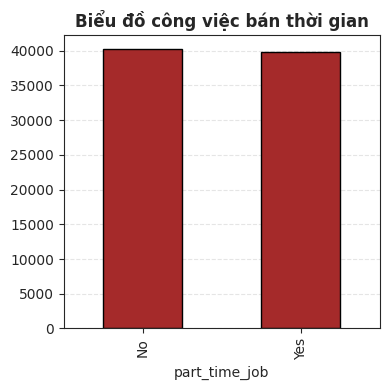

In [ ]:
#Biểu đồ công việc bán thời gian
df['part_time_job'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="brown", edgecolor="black")
plt.title('Biểu đồ công việc bán thời gian', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

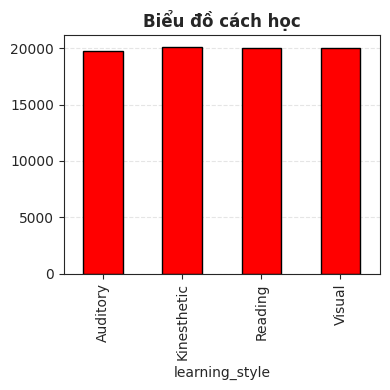

In [ ]:
#Biểu đồ cách học
df['learning_style'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="red", edgecolor="black")
plt.title('Biểu đồ cách học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

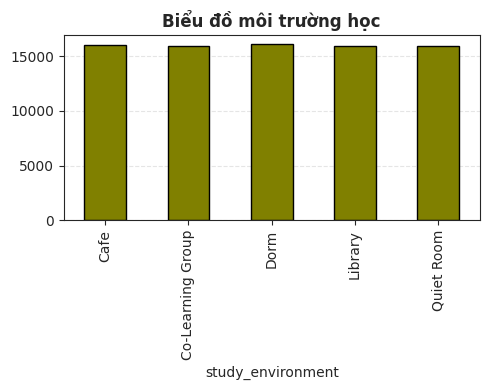

In [ ]:
#Biểu đồ môi trường học
df['study_environment'].value_counts().sort_index().plot(kind='bar', figsize=(5, 4), color="olive", edgecolor="black")
plt.title('Biểu đồ môi trường học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

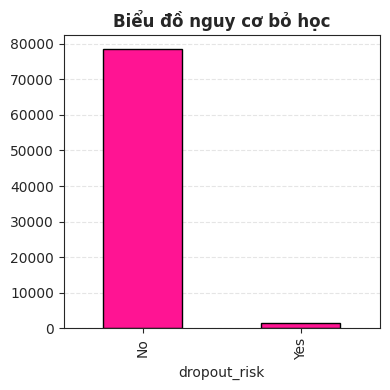

In [ ]:
#dropout_risk
df['dropout_risk'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="deeppink", edgecolor="black")
plt.title('Biểu đồ nguy cơ bỏ học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##3.3 Phân tích Hai biến (Bivariate Analysis)

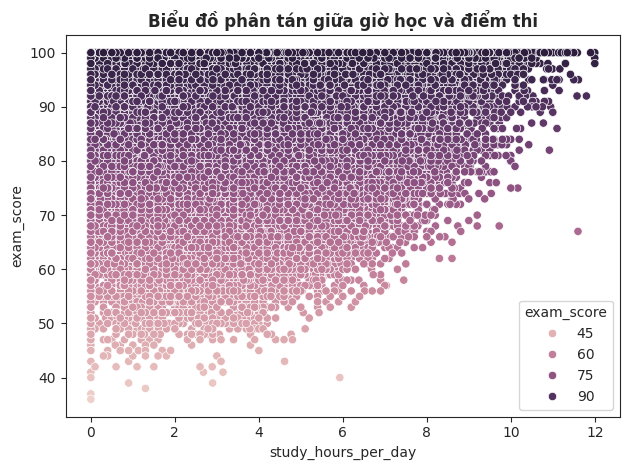

In [ ]:
#Biểu đồ phân tán giữa giờ học và điểm thi
sns.scatterplot(x=df['study_hours_per_day'], y=df['exam_score'], data=df, hue='exam_score')
plt.title("Biểu đồ phân tán giữa giờ học và điểm thi", fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-2451675096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stress_category', y='exam_score', data=df, palette='viridis')


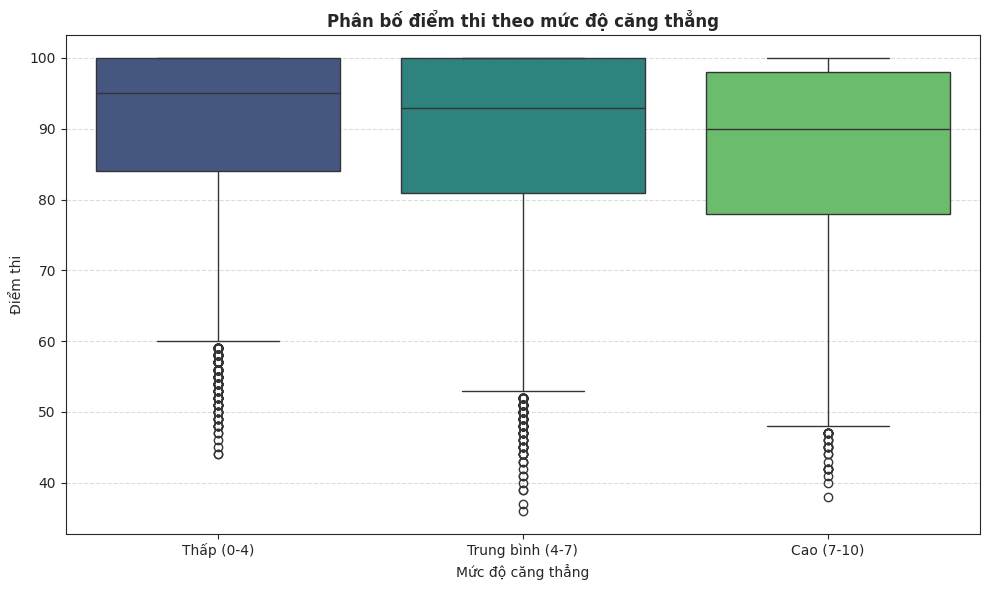

In [ ]:
#Phân bố điểm thi theo mức độ căng thẳng
df_stress = df #gán cái biến khác để test
df_stress['stress_category'] = pd.cut(df_stress['stress_level'], bins=[0, 4, 7, 10], labels=['Thấp (0-4)', 'Trung bình (4-7)', 'Cao (7-10)'])

# Tạo boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_category', y='exam_score', data=df, palette='viridis')

# Thiết lập tiêu đề và nhãn
plt.title('Phân bố điểm thi theo mức độ căng thẳng', fontweight='bold')
plt.xlabel('Mức độ căng thẳng')
plt.ylabel('Điểm thi')
plt.xticks()
plt.yticks()

# Hiển thị grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-1161618059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')


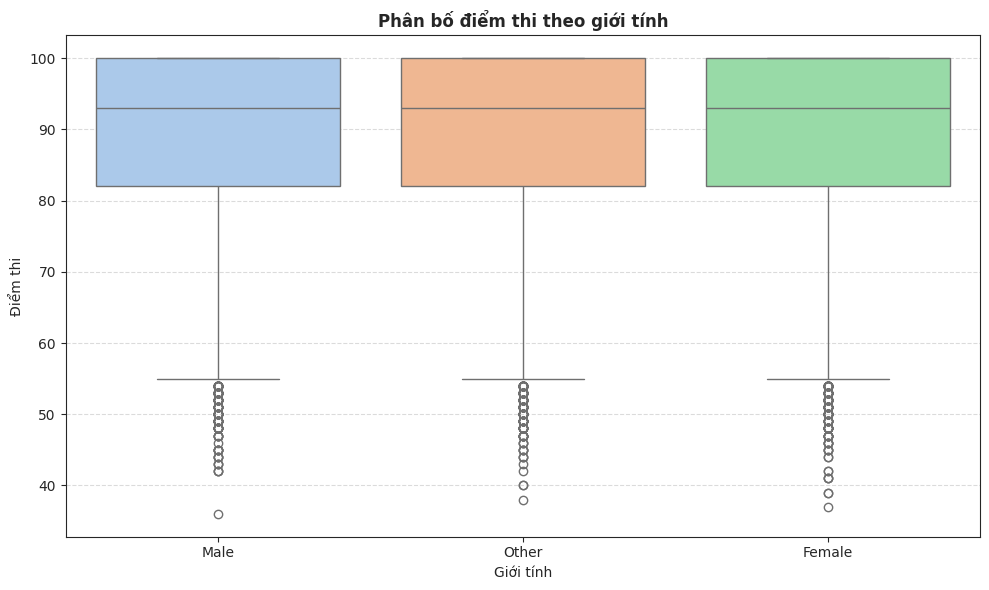

In [ ]:
#Phân bố điểm thi theo giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')
plt.title('Phân bố điểm thi theo giới tính', fontweight='bold')
plt.xlabel('Giới tính')
plt.ylabel('Điểm thi')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-33-3666435240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='major', y='exam_score', data=df, palette='pastel')


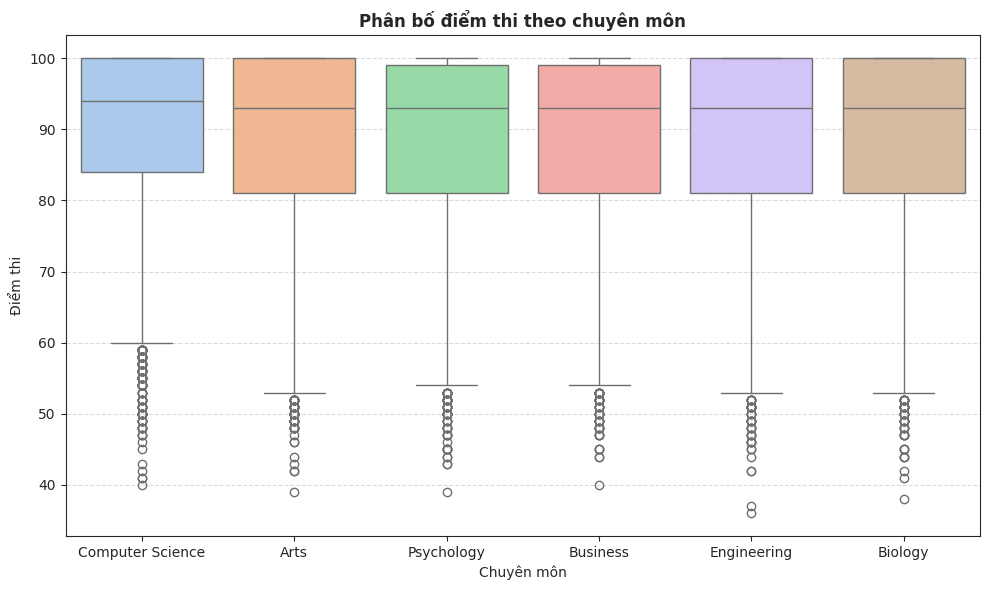

In [ ]:
#Phân bố điểm thi theo chuyên môn
plt.figure(figsize=(10, 6))
sns.boxplot(x='major', y='exam_score', data=df, palette='pastel')
plt.title('Phân bố điểm thi theo chuyên môn', fontweight='bold')
plt.xlabel('Chuyên môn')
plt.ylabel('Điểm thi')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-2817974674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dropout_risk', y='exam_score', palette='pastel')


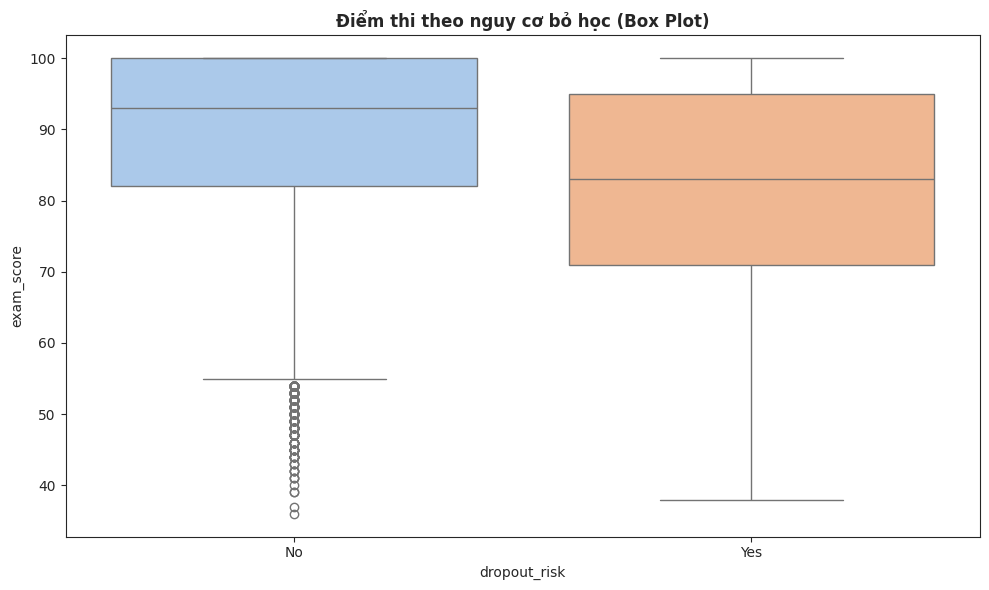

In [ ]:
#Điểm thi theo nguy cơ bỏ học (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dropout_risk', y='exam_score', palette='pastel')
plt.title('Điểm thi theo nguy cơ bỏ học (Box Plot)', fontweight='bold')
plt.tight_layout()
plt.show()

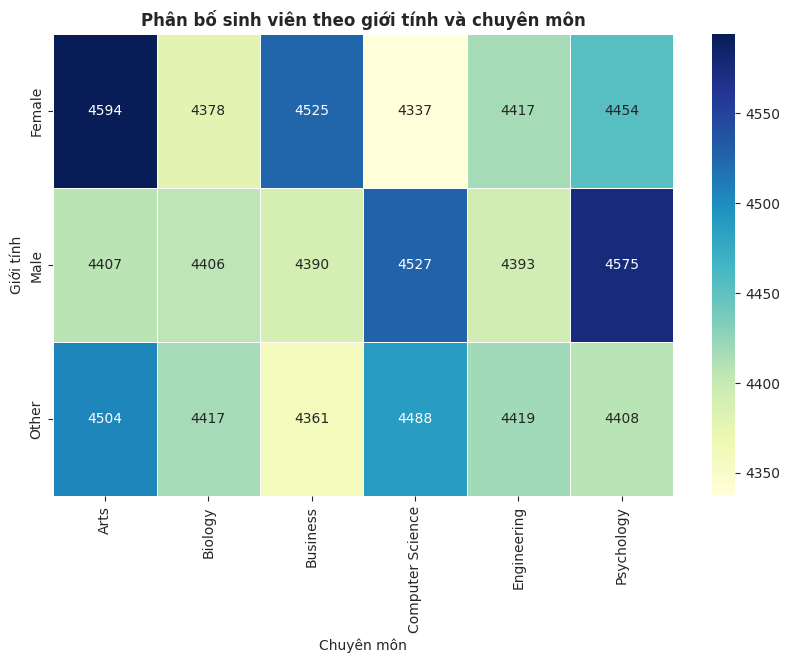

In [ ]:
#Bảng chéo giữa giới tính và chuyên môn
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(df['gender'], df['major']),
    annot=True,      #Hiển thị giá trị
    fmt='d',         #Định dạng số nguyên
    cmap='YlGnBu',   #Màu sắc
    linewidths=0.5
)
plt.title('Phân bố sinh viên theo giới tính và chuyên môn', fontweight='bold')
plt.xlabel('Chuyên môn')
plt.ylabel('Giới tính')
plt.show()

##3.4 Ma trận tương quan

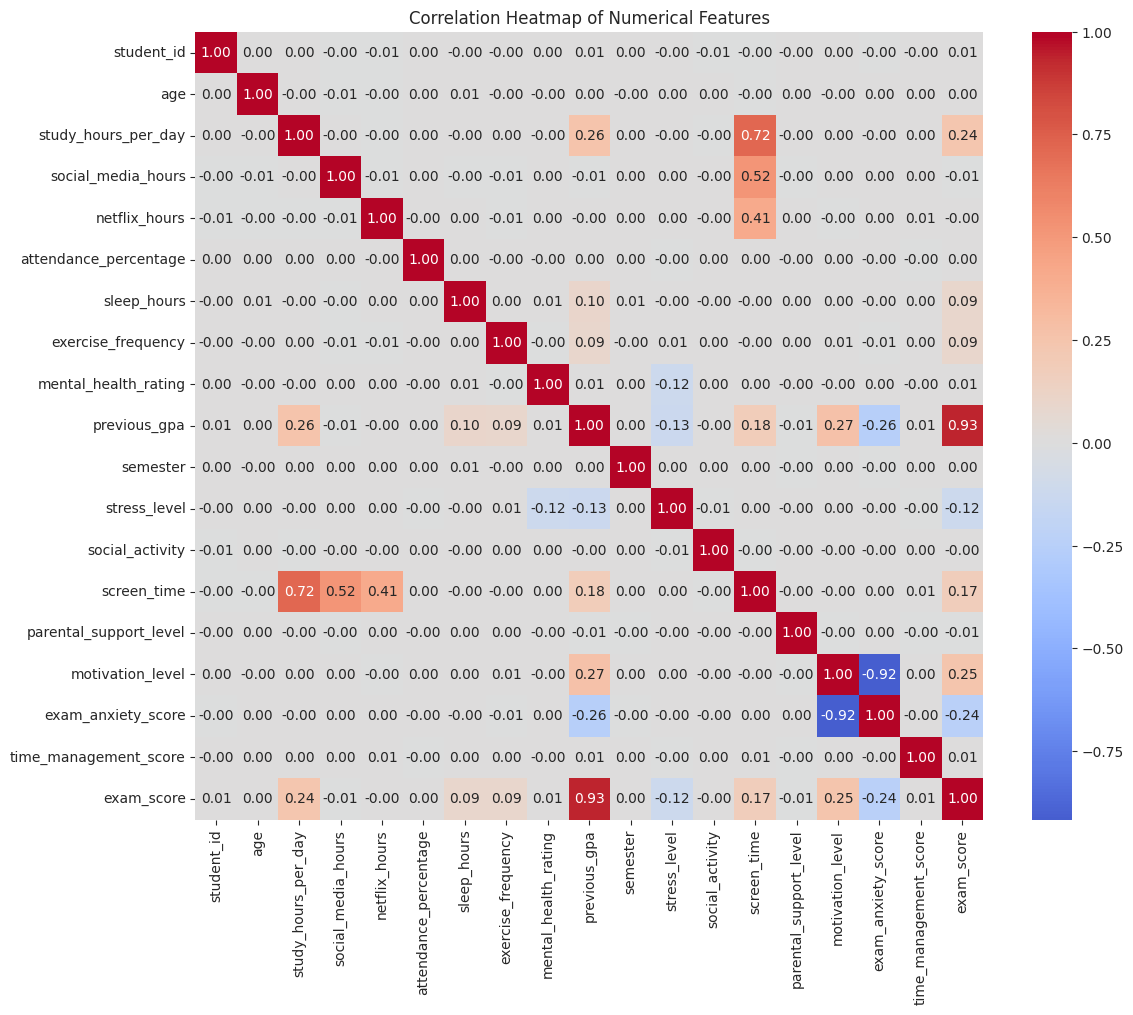

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

#4.Data Preprocessing



```
- Trình bày các bước đã thực hiện: làm sạch dữ liệu (handling missing values, outliers), chuẩn hóa (normalization), biến đổi (transformation).

- Trình bày lý do lựa chọn từng kỹ thuật.
```




## 4.1 Làm sạch dữ liệu (Handling missing values, Outliers)

###4.1.1 Xử lý giá trị bị thiếu (Missing Values)

In [ ]:
missing_vals = df.isnull().sum()
if missing_vals.sum() > 0:
    print(f"\nMissing Values: {missing_vals[missing_vals > 0]}")
else:
    print("No missing values found!")

No missing values found!


Do không có giá trị bị thiếu nên ta sẽ bỏ qua bước xử lý này

###4.1.2 Xử lý giá trị ngoại lai (Outlier)

Ép kiểu dữ liệu vài thuộc tính để vẽ biểu đồ boxplot

In [ ]:
df_int64 = df #Gán vào 1 dataFrame mới để xử lý
df_int64 = df_int64.astype({
    'study_hours_per_day': 'int',
    'social_media_hours': 'int',
    'netflix_hours': 'int',
    'attendance_percentage': 'int',
    'sleep_hours': 'int',
    'mental_health_rating': 'int',
    'previous_gpa': 'int',
    'stress_level': 'int',
    'screen_time': 'int',
    'time_management_score': 'int'
})
df_int64.dtypes

,0
student_id,int64
age,int64
gender,object
major,object
study_hours_per_day,int64
social_media_hours,int64
netflix_hours,int64
part_time_job,object
attendance_percentage,int64
sleep_hours,int64


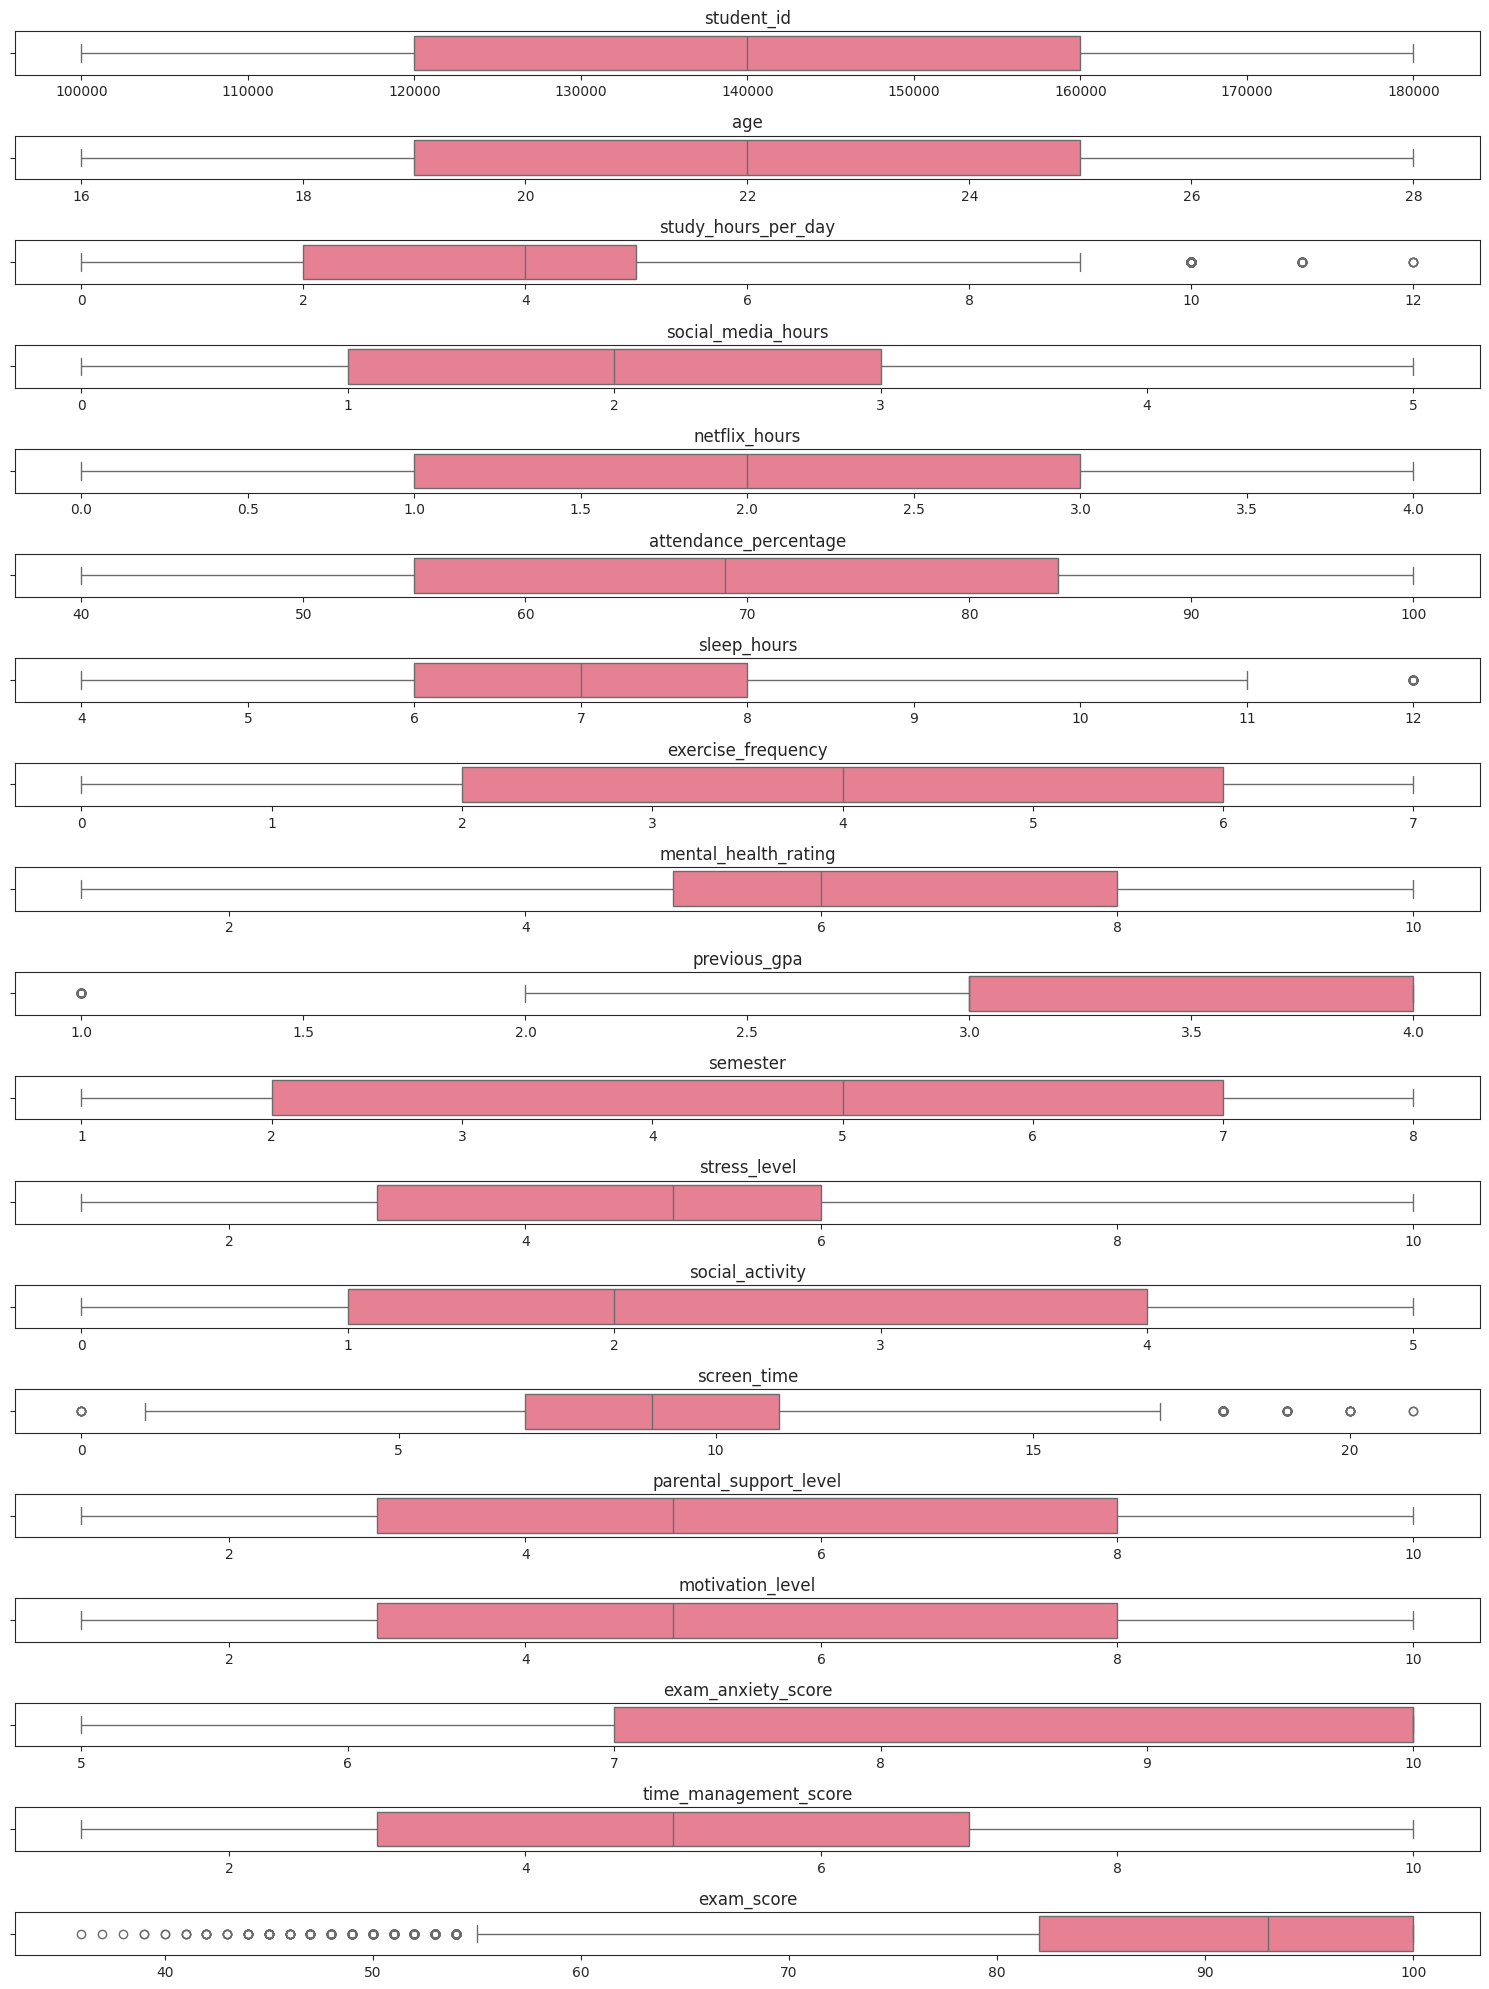

In [ ]:
#Vẽ biều đồ Boxplot tìm giá trị ngoại lai
col_names = list(df_int64.select_dtypes(include=int).columns)
fig, axes = plt.subplots(len(col_names), 1, figsize=(15, 20))

for row, column in enumerate(col_names):
    sns.boxplot(x=df_int64[column].values, ax = axes[row])
    axes[row].set_title(column)

plt.tight_layout()
plt.show()

Ta thấy có 5 thuộc tính là study_hour_per_date, sleep_hour, screen_time, exam_score, previous_gpa có giá trị ngoại lai.

Records before removing outlier:  (80000, 32)
Records after removing outlier:  (79237, 32)


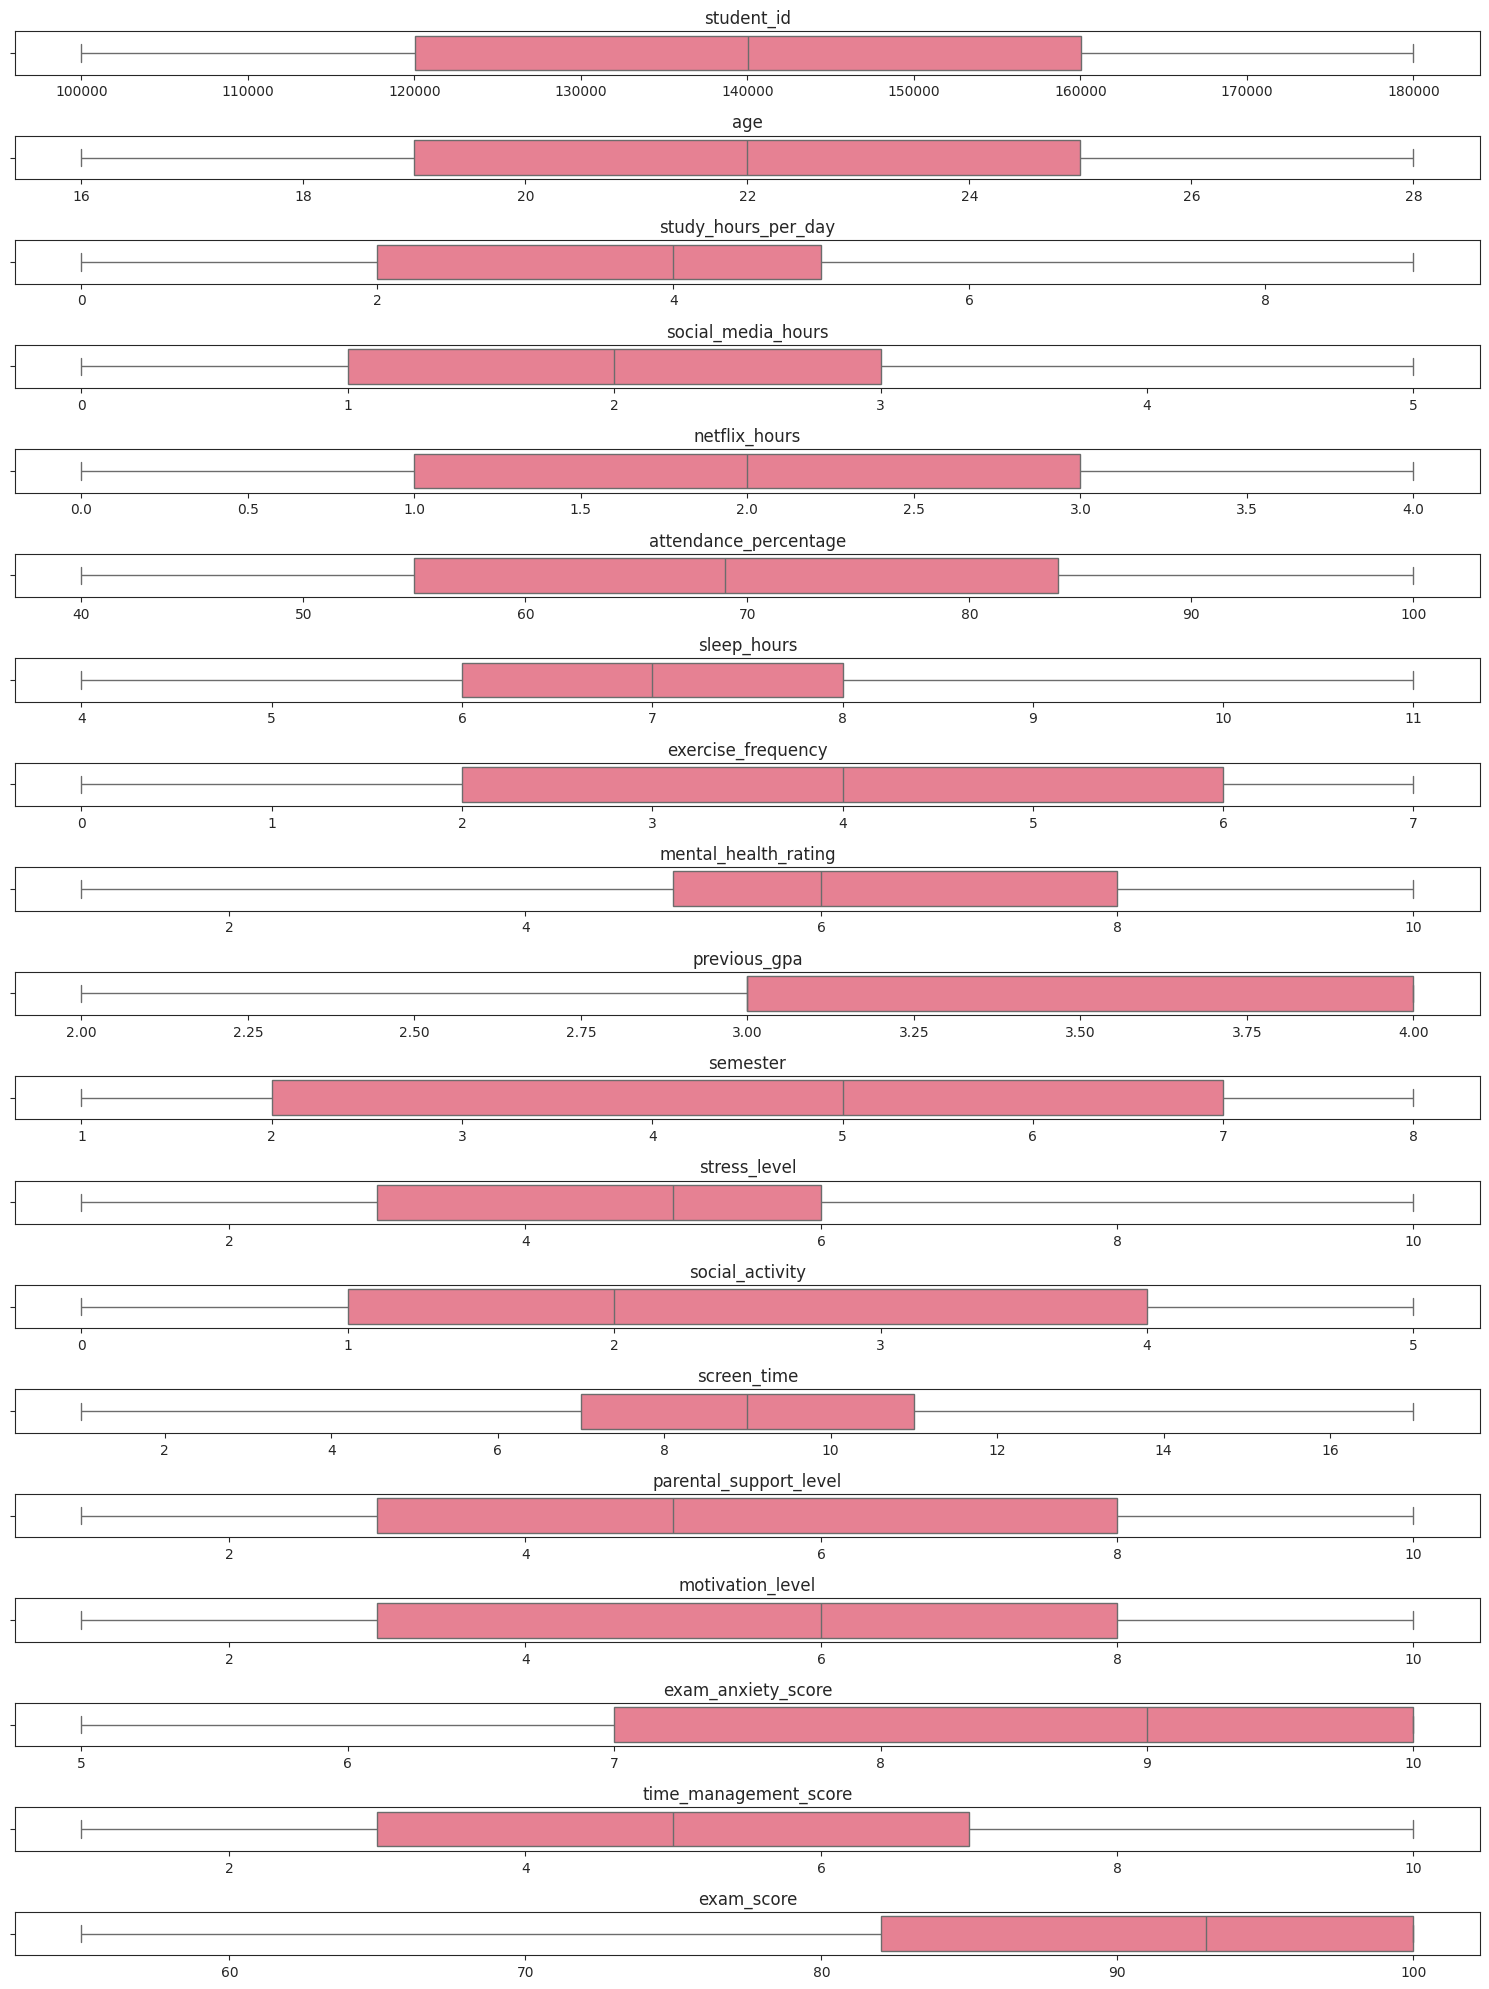

In [ ]:
#Xử lý giá trị ngoại lai
outlier_cols =  ['study_hours_per_day', 'sleep_hours', 'previous_gpa', 'screen_time', 'exam_score']

print("Records before removing outlier: ", df_int64.shape)

for i in outlier_cols:
    q1 = df_int64[i].quantile(0.25)
    q3 = df_int64[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    index_list = df_int64[(df_int64[i] < lower_bound) | (df_int64[i] > upper_bound)].index
    df_int64.drop(index_list, inplace=True)

print("Records after removing outlier: ", df_int64.shape)

#Vẽ biểu đồ
fig, axes = plt.subplots(len(col_names), 1, figsize=(15, 20))
for row, column in enumerate(col_names):
    sns.boxplot(x=df_int64[column].values, ax = axes[row])
    axes[row].set_title(column)

plt.tight_layout()
plt.show()

## 4.2 Chuẩn hóa (Normalization)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_encoder = df #gán cái biến khác để test

#Kiểm tra các thuộc tính danh mục và thuộc tính số
feature_columns = [col for col in df_encoder.columns if col not in ['student_id', 'exam_score']]
categorical_features = df_encoder[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_features = df_encoder[feature_columns].select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {len(numerical_features)} features")

Categorical features: ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']
Numerical features: 21 features


In [ ]:
# Chuẩn hóa gender và major
# df_GnM_encoded = pd.get_dummies(df_encoder, columns=['gender', 'major'], drop_first=True)
# df_GnM_encoded
#sài onehotencoding từ pandas thì ví dụ có 3 danh mục thì sẽ mất 1 cái

# Chuẩn hóa toàn bộ thuộc tính danh mục bằng OneHotEncoder của scikit-learn
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))
df_GnM_encoded = pd.concat([df_encoder, one_hot_df], axis=1)
df_GnM_encoded = df_GnM_encoded.drop(categorical_features, axis=1)
df_GnM_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   student_id                             80000 non-null  int64   
 1   age                                    80000 non-null  int64   
 2   study_hours_per_day                    80000 non-null  float64 
 3   social_media_hours                     80000 non-null  float64 
 4   netflix_hours                          80000 non-null  float64 
 5   attendance_percentage                  80000 non-null  float64 
 6   sleep_hours                            80000 non-null  float64 
 7   exercise_frequency                     80000 non-null  int64   
 8   mental_health_rating                   80000 non-null  float64 
 9   previous_gpa                           80000 non-null  float64 
 10  semester                               80000 non-null  int

## 4.3 Biến đổi (Transformation)

In [ ]:
#Biến đổi thuộc tính số theo StandarScaler
standard_scaler = StandardScaler()

# Identify numerical features, including the newly engineered ones
numerical_features_after_fe = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features_after_fe = [col for col in numerical_features_after_fe if col not in ['student_id', 'exam_score']]

standard_scaled_data = standard_scaler.fit_transform(df[numerical_features_after_fe])
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features_after_fe)
display(standard_scaled_df) #df này chỉ có các thuộc tính số đã biến đổi

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,...,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,screen_time_total,study_sleep_ratio,stress_anxiety_combined,support_motivation_interaction
0,1.066790,1.731919,0.344972,-1.641677,0.019161,-0.557064,-0.225430,-0.418464,0.858879,0.218997,...,-1.467026,0.441221,1.225264,0.527057,-0.283052,-0.959906,-0.040661,1.796835,0.105222,1.391153
1,1.600758,0.761237,-1.384614,-1.382158,1.063417,0.124429,0.210953,-0.002138,0.858879,1.090343,...,1.466762,-0.493744,0.529203,-1.216462,0.830286,0.192381,-1.174419,0.495235,0.859376,-0.677348
2,-1.336063,-0.885369,1.175173,-1.122639,0.699947,1.487414,0.210953,-0.574587,0.405191,-0.216677,...,1.466762,-0.601625,-0.862921,1.224465,-1.396390,0.806934,-0.300481,-1.069777,0.180638,-0.128562
3,1.333774,-0.386398,1.451907,0.261462,0.538405,-1.920049,-0.225430,0.882557,0.858879,0.654670,...,0.293247,0.728903,-0.166859,-0.867758,0.830286,-0.883087,1.045856,0.547885,0.406884,-0.635133
4,0.799807,0.262265,-1.177064,0.607487,-0.407773,-0.352616,1.083721,1.246843,0.858879,-0.216677,...,-0.293511,-0.098182,1.225264,-1.565166,0.830286,0.614886,-0.300481,0.293004,0.821668,-0.888419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-1.603047,-0.236706,-0.277679,-0.863120,0.624945,-0.625213,-1.534582,-3.020507,-0.437374,-1.088023,...,-0.880268,-0.493744,-1.558982,-0.519054,0.830286,-0.076486,-0.654780,-0.050545,-0.535808,-1.099491
79996,-1.603047,-1.484135,-1.453798,0.780500,1.703818,-1.988198,-1.534582,-0.574587,-2.900254,-1.523696,...,0.293247,-1.788311,-0.862921,-1.216462,0.830286,0.499658,-1.457859,-0.975978,0.142930,-1.015062
79997,1.066790,-0.037118,-0.623596,-0.344082,-1.377027,0.874070,1.520105,-0.054178,-0.977479,-0.652350,...,0.293247,-0.781426,0.529203,-1.565166,0.830286,-1.612869,-0.820120,-0.382482,0.783961,-0.972848
79998,0.265839,-0.186809,-1.315431,1.299538,-0.650086,-0.829661,-0.661814,0.414189,0.145940,0.654670,...,0.880004,-0.134142,-1.210952,0.875761,-0.839721,-0.691039,-0.182381,0.092793,-1.553916,-0.592919


## 4.4 Chuyển đổi và Kỹ thuật Đặc trưng (Conversion and Feature Engineering)


In [ ]:
#Thời gian trên MXH
df['screen_time_total'] = (df['social_media_hours'] + df['netflix_hours'] + df.get('screen_time', 0))

#Tỉ số giữa học và ngủ
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']

#Căng thẳng lo âu kết hợp
df['stress_anxiety_combined'] = df['stress_level'] + df['exam_anxiety_score']

#Sự tác động từ động lực và hỗ trợ
df['support_motivation_interaction'] = (df['parental_support_level'] * df['motivation_level'])

## 4.5 Xử lý Đa cộng tuyến (Multicollinearity Handling)


### Tính ma trận tương quan


In [ ]:
# previous_gpa vs exam_score: gây ra đa cộng tuyến

### Tính hệ số VIF



```
VIF < 5: OK

5 ≤ VIF < 10: cần cân nhắc

VIF ≥ 10: cần xử lý
```



### Xử lý nếu phát hiện đa cộng tuyến

## 4.6 Đánh giá và Giảm thiểu Sai lệch Tự báo cáo (Assessing and Mitigating Self-Report Bias)

# 5.Xây dựng Mô hình (Model Building)

```
- Đối với mỗi mô hình/thuật toán được sử dụng (ví dụ: Decision Tree, k-Means, Apriori,...):

- Trình bày cơ sở lý thuyết ngắn gọn của thuật toán.

- Lý do lựa chọn thuật toán này cho bài toán của nhóm.

- Quá trình thực thi và các tham số được lựa chọn.

```




## 5.1 Phân loại/Dự đoán Kết quả Học tập (Classification/Prediction of Learning Outcomes)


## 5.2 Phân cụm Sinh viên (Student Clustering)


## 5.3 Phân tích Tương quan và Khám phá Mẫu hình (Correlation Analysis and Pattern Discovery)


## 5.4 Phân tích Ảnh hưởng Yếu tố (Feature Importance)


# 6.Kết quả và phân tích



```
-Trình bày các kết quả thu được từ mô hình (ví dụ: độ chính xác của mô hình phân loại, các cụm được hình thành, các luật kết hợp phổ biến).

- Đây là phần quan trọng nhất: Phân tích, diễn giải ý nghĩa của những kết quả này trong bối cảnh của bộ dữ liệu. Kết quả nói lên điều gì? Có khám phá được tri thức hữu ích nào không?

```



# 7.Kết luận và Hướng phát triển



```
- Tóm tắt lại toàn bộ công việc đã làm và các kết quả chính.

- Nêu ra các hạn chế của dự án và đề xuất những hướng cải thiện hoặc phát triển trong tương lai.

```

